In [1]:
import sympy as sp
import numpy as np 
import matplotlib.pyplot as plt 

In [25]:
lam = sp.Symbol('\lambda')
phi_R = sp.Symbol('{{\phi_R}}')
phi_X  = sp.Symbol('{{\phi_X}}')
phi_O = sp.Symbol('{{\phi_O}}')
phi_P = sp.Symbol('{{\phi_P}}')
gamma = sp.Symbol('{{\gamma^*}}')
nu = sp.Symbol(r'\nu')
beta = sp.Symbol(r'\beta')
Kd = sp.Symbol('K_D')
_phi_P = 1 - phi_X - phi_O - phi_R
eq = phi_R * gamma * (1 + Kd / ((nu * _phi_P / lam) - 1))**-1
# a = Kd - 1
# b = nu * _phi_P + gamma * phi_R
# c = nu * _phi_P * gamma * phi_R
# soln = (-b + sp.sqrt(b**2 - 4 * a * c))/(2 * a)
_lam = sp.solve(lam - eq, lam)
_lam[0]

(\nu*{{\phi_O}} + \nu*{{\phi_R}} + \nu*{{\phi_X}} - \nu - {{\gamma^*}}*{{\phi_R}} - sqrt(-4*K_D*\nu*{{\gamma^*}}*{{\phi_O}}*{{\phi_R}} - 4*K_D*\nu*{{\gamma^*}}*{{\phi_R}}**2 - 4*K_D*\nu*{{\gamma^*}}*{{\phi_R}}*{{\phi_X}} + 4*K_D*\nu*{{\gamma^*}}*{{\phi_R}} + \nu**2*{{\phi_O}}**2 + 2*\nu**2*{{\phi_O}}*{{\phi_R}} + 2*\nu**2*{{\phi_O}}*{{\phi_X}} - 2*\nu**2*{{\phi_O}} + \nu**2*{{\phi_R}}**2 + 2*\nu**2*{{\phi_R}}*{{\phi_X}} - 2*\nu**2*{{\phi_R}} + \nu**2*{{\phi_X}}**2 - 2*\nu**2*{{\phi_X}} + \nu**2 + 2*\nu*{{\gamma^*}}*{{\phi_O}}*{{\phi_R}} + 2*\nu*{{\gamma^*}}*{{\phi_R}}**2 + 2*\nu*{{\gamma^*}}*{{\phi_R}}*{{\phi_X}} - 2*\nu*{{\gamma^*}}*{{\phi_R}} + {{\gamma^*}}**2*{{\phi_R}}**2))/(2*(K_D - 1))

In [26]:
deriv = sp.diff(_lam[1], phi_R)
# optimal 1 is real
optimal = sp.solve(deriv, phi_R)

In [27]:
deriv

(\nu - {{\gamma^*}} + (-2*K_D*\nu*{{\gamma^*}}*{{\phi_O}} - 4*K_D*\nu*{{\gamma^*}}*{{\phi_R}} - 2*K_D*\nu*{{\gamma^*}}*{{\phi_X}} + 2*K_D*\nu*{{\gamma^*}} + \nu**2*{{\phi_O}} + \nu**2*{{\phi_R}} + \nu**2*{{\phi_X}} - \nu**2 + \nu*{{\gamma^*}}*{{\phi_O}} + 2*\nu*{{\gamma^*}}*{{\phi_R}} + \nu*{{\gamma^*}}*{{\phi_X}} - \nu*{{\gamma^*}} + {{\gamma^*}}**2*{{\phi_R}})/sqrt(-4*K_D*\nu*{{\gamma^*}}*{{\phi_O}}*{{\phi_R}} - 4*K_D*\nu*{{\gamma^*}}*{{\phi_R}}**2 - 4*K_D*\nu*{{\gamma^*}}*{{\phi_R}}*{{\phi_X}} + 4*K_D*\nu*{{\gamma^*}}*{{\phi_R}} + \nu**2*{{\phi_O}}**2 + 2*\nu**2*{{\phi_O}}*{{\phi_R}} + 2*\nu**2*{{\phi_O}}*{{\phi_X}} - 2*\nu**2*{{\phi_O}} + \nu**2*{{\phi_R}}**2 + 2*\nu**2*{{\phi_R}}*{{\phi_X}} - 2*\nu**2*{{\phi_R}} + \nu**2*{{\phi_X}}**2 - 2*\nu**2*{{\phi_X}} + \nu**2 + 2*\nu*{{\gamma^*}}*{{\phi_O}}*{{\phi_R}} + 2*\nu*{{\gamma^*}}*{{\phi_R}}**2 + 2*\nu*{{\gamma^*}}*{{\phi_R}}*{{\phi_X}} - 2*\nu*{{\gamma^*}}*{{\phi_R}} + {{\gamma^*}}**2*{{\phi_R}}**2))/(2*(K_D - 1))

In [28]:
optimal[1].factor()

-({{\phi_O}} + {{\phi_X}} - 1)*(2*K_D*\nu*{{\gamma^*}} - \nu**2 - \nu*{{\gamma^*}} + \nu*sqrt(K_D*\nu*{{\gamma^*}}) - {{\gamma^*}}*sqrt(K_D*\nu*{{\gamma^*}}))/(4*K_D*\nu*{{\gamma^*}} - \nu**2 - 2*\nu*{{\gamma^*}} - {{\gamma^*}}**2)

In [29]:
def growth(phi_R, phi_X, gamma, nu, Kd, phi_O = 0.5):
    phi_P =  1 - phi_X - phi_O - phi_R
    a = (Kd - 1)
    b = (nu * phi_P + phi_R * gamma)
    c = -nu * gamma * phi_R * phi_P
    return (-b + np.sqrt(b**2 - 4 * a * c)) / (2 * a)

In [45]:
def optimal_allocation(phi_X, nu, gamma, Kd, phi_O=0.5):
    numer = (phi_O + phi_X - 1) * (2 * Kd * nu * gamma - nu**2  -nu * gamma + np.sqrt(Kd * nu * gamma) * (nu - gamma))
    denom = 4 * Kd * nu * gamma - nu**2 - 2 * nu * gamma - gamma**2
    return -numer / denom

(0.0, 1.5)

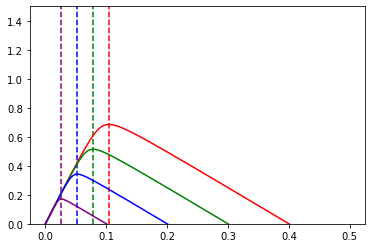

In [47]:
phi_O = 0.5
phi_X_range = [0.1, 0.2, 0.3, 0.4]
phi_R_range = np.linspace(0, 0.5, 200)
gamma = 17.1 * 3600 / 7459 
nu = 2.5
Kd = 0.02 
color = ['red', 'green', 'blue', 'purple', 'black']
fig, ax = plt.subplots(1,1)
for i, x in enumerate(phi_X_range):
    find_opt = optimal_allocation(x, nu, gamma, Kd, phi_O=phi_O)
    growth_range = growth(phi_R_range , x, gamma, nu, Kd, phi_O=phi_O) 
    ax.plot(phi_R_range , growth_range, '-', color=color[i])  
    ax.vlines(find_opt, 0, 3, linestyle='--', color=color[i])
# ax.set_xlim([0, 0.2])
ax.set_ylim([0, 1.5])
